In [4]:
import pandas as pd
import numpy as np
from scipy.sparse import hstack

import re
from textblob import TextBlob

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_excel(r"D:\data science projects\lead status project\nlp.xlsx","Sheet1")

df.head()

,Lead Name,Location,Status,Status information
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evn..."
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to ema..."
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ..."


In [3]:
df.columns

Index(['Lead Name', 'Location', 'Status ', 'Status information'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lead Name           1001 non-null   object
 1   Location            980 non-null    object
 2   Status              998 non-null    object
 3   Status information  977 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


In [5]:
df['Status ']=df['Status '].str.lower()
df['Status information']=df['Status information'].str.lower()
df['Lead Name']=df['Lead Name'].str.lower()
df['Location']=df['Location'].str.lower()

df['Status ']=df['Status '].replace(['conveted','converted '], 'converted', regex=True)

# Remove Numbers & Punctuations

In [6]:
names=[]
names2=[]
clean_info=[]


for x in range(len(df['Status information'])):
    s=df['Status information'][x]
    
    if type(s)!=str:
        names.append(s)
        names2.append(s)
        clean_info.append(None)
    else:
        l=re.findall('[\||/|(]([a-zA-Z]*?)[:\)]',s)
        names.append(l)
        if len(l)>0:
            names2.append(l[0])
        else:
            names2.append(None)
            
        s1=re.sub(r'[\||/|(]([a-zA-Z]*?)[:\)|]', ' ', s)
        s2=re.sub(r'[ \t]([a-zA-Z]*?)[:]', ' ', s1)
        s3 = re.sub(r"[^a-zA-Z]+", ' ', s2)
        clean_info.append(s3)

In [7]:
clean_info

[' share me details available in evng postponed the plans for training currently not interested now',
 ' cal me tmrw shared details to email share details to email will check n revert received your email i m looking for asq certification',
 ' rnr',
 ' i want only server cal busy reg for server',
 ' rnr gave info he said he will revert in hr planning for next month share details',
 ' i will check demo attended demo i will get back i will think and respond not interested',
 ' asking code',
 ' mail shred for ml tensorflow corprt shared but rnr',
 ' askng code',
 None,
 ' rnr share me tableau recorded session check n revert not reachable rnr have rotational shifts will check details n confirm rnr i will confirm by tmrw rnr share me details of webinar on rd',
 ' call me pm om in a meeting cal me later rnr webinar on weekends shared details of ds rnr',
 ' i m under medication will b back after a wk ct is comfortable share me bangalore ofc address at home they insist to join in classroom only

In [8]:
df2=df.assign(executive_name=names2,clean_info=clean_info)

# Replace ShortCut Words

In [9]:
short_words=['rnr','ct','evng','tmrw','asq','cal','ml','wk','ds','intrstd','othr','cls','hosp','nxt','psbl',
             'cmng','shft','rt','plz','reachble','iot','sql','prjts','cmpny','provd','sugstd','dng','ystday',
             'gng','frnd','frshr','qa','qc','abt','btwn','psbl','repsnd','ofc','msg','intrsd','ned','plng',
             'req','alrdy','nyt','yr','shrd','exp','cnfrm','Alrdy','phn','tim','lkng','cert','wks','btwn','cme','db','mem',
            'prev','prog','les','amt','info','nw','psbl','wknds','autamtn','devps','devops','trang','pm','am']

currect_words=['ringing no response','carrer transition','evening','tomorrow','american society for quality','call',
               'machine learning','week','data science','interested','other','class','hosptal','next','possible','coming',
               'shift','right','please','reachable','Internet of things','structured query language','projects','company',
               'provide','suggested','doing','yesterday','going','friend','fresher',' quality assurance','quality control',
              'about','between','possible','respond','office','message','interested','need','planing','request','already',
              'night','year','shared','experience','conform','already','phone','time','looking','certification','weeks',
               'between','came','database','members','previous','programing','less','amount','information','now','possible',
               'weekends','automation','development process','development process','training','evening','morning']

In [10]:
df2['clean_info']=df2['clean_info'].replace(short_words, currect_words, regex=True)

In [11]:
df2.head()

,Lead Name,Location,Status,Status information,executive_name,clean_info
0,raja,hyderabad,not converted,"14/8/prema: share me details, available in evn...",prema,share me details available in evening postpon...
1,anirudh reddy,pune,not converted,"14/8/prema: cal me tmrw, shared details to ema...",prema,call me tomorrow shared details to email shar...
2,sapna dewani,bangalore,converted,16|aug|mohan:rnr,mohan,ringing no response
3,suresh,mumbai,not converted,14/8/17(surendra):i want only server 16|aug|mo...,surendra,i want only server call busy reg for server
4,akshay shinde,hyderabad,not converted,"14/8/prema:rnr 16/8/prema: gave info, he said ...",prema,ringing no response gave information he said ...


In [12]:
df2=df2.drop([2],axis=0)

df2=df2.reset_index()

# TextBlob : Spelling Correction

In [13]:
clean_text2=[]
for x in df2['clean_info']:
    if type(x)!=str:
        clean_text2.append(type(x))
    else:
        clean_text2.append(str(TextBlob(x).correct()))
        print(str(TextBlob(x).correct()))

 share me details available in evening postponed the plans for training currently not interested now
 call me tomorrow shared details to email share details to email will check n reveright received your email i m looking for american society for quality cerightification
 i want only server call busy red for server
 ringing no response gave information he said he will reveright in he planning for next month share details
 i will check domo attended domo i will get back i will think and respond not interested
 asking code
 mail shred for machine learning tensorflow copyright shared but ringing no response
 asking code
 ringing no response share me tableaux recorded session check n reveright not readable ringing no response have rational shifts will check details n confirm ringing no response i will confirm by tomorrow ringing no response share me details of weimar on rd
 call me evening om in a meeting call me later ringing no response weimar on weekendata science shared details of data 

 ringing no response ringing no response i want only classroom not interested in online call disconnecarrer transition not interested
 ringing no response call me tomorrow after morning he is busy asked to call later
 ringing no response details shared will go to office tomorrow
 share me details u can call me tomorrow afternoon share me link if possible i will join ringing no response ringing no response
 ringing no response share me details today i may not tend share me recorded session in in a meeting will call u back asked to share details ad he will reveright when he is free
already red
 ringing no response details shared
 not interested delete my number
 interested nd coming office on andy
 share me link i will get back share me office details ringing no response wrong number call disconnecarrer transition number correcarrer transition wrong number morning not about
 shared details ringing no response shared details i want tableaux with structures query language language
old clie

 july ringing no response july ringing no response july ringing no response july ringing no response aug office busy went going hometwn call next tuesday not eachble not readable
 ringing no response morning in office after i will call u
 call disconnecarrer transitioneed details shared not readable ringing no response asked to call at evening ringing no response asked to call evening he postponed it for months will let us know intimated about new batch its not possible to join now
 call me tomorrow morning call evening ringing no response ringing no response 
 july she will try class july ringing no response july ringing no response july after months
 ringing no response discuss and disconnecarrer transition disconnecarrer transition ringing no response ringing no response ringing no response ringing no response
 details shared ringing no response ringing no response
 ringing no response shared details to email i m looking for other option too i will let u know dropped the plans as of

 share me data science and machine learning mails i will get back i will call you back i will text u share me details morning busy now i will get back not readable morning in meeting call you later morning not interested
 ringing no response ringing no response i will get back
 july attend tomorrow evening session july busy with projects miss evening sessions july he will check sandy domo july he will come tomorrow july company trying to provide suggested our agenda nov shankar lady doing of blockchain
 looking for career transition shared details ringing no response shared details call me tomorrow at morning i shall call u back as in in cab now prima share me details once again link to check will join session on monday shared session link prima hi prima sorry for delayed response was bit busy with some office work well frankly speaking i was not that pleased with yesterday session few pracarrer transitionicall approach was missing as i morning looking for cantata science on and real t

 need to call after mints he didn gone through recorded session not possible to attend domo said will speak to trainer ringing no response ringing no response said he will speak to want he is interested to join busy with some work who it completed will join not readable
 unable to connecarrer transition due to network issue shared details will check n reveright call evening share me domo details if possible will attend
 shared details
 july ringing no response july she will come today evening
 ringing no response share me link ringing no response i will call u back dont call me
 ringing no response mail sent switched off domo session shared will go through nd ill reveright he is busy on weekdays said he will go through our domo session this weekend and asked to call on monday ringing no response ringing no response he will b in travel this week he will intimate who he returned not connecarrer transitioning
 share details ringing no response need to call in d evening ringing no response

 july ringing no response nd need went july discuss with trainer attended domo need class in b w to 
 ringing no response ringing no response ringing no response ringing no response
 present he is out of hyderabad details shared and need to call on monday ringing no response still he didn reach hyderabad he asked to call on monday not readable not readable ringing no response asked to call evening he will go through recorded session not readable switched off not connecarrer transitioning ringing no response ringing no response switched off
 details shared i post pond august i defiantly know u
 ringing no response shared details looking for career transition ringing no response ringing no response
 july call in b w to july bad opinion on online request career transition to far check with friendata science and finalise july i will let u know
 please share me details i will check evening sessions on th call disconnected i want weekend call me after ringing no response weekend is better sh

 june check details and finalise by tomorrow evening july check smorningple cerightificate and finalise by days
 he want til cerightified person job
 june moran not readable june ringing no response
 june interested come to office tomorrow bulge june ringing no response
 june not readable june ringing no response nd job consultant
 june ringing no response june ringing no response nd not interested
 june classroom to far cheek nd reply
 call me tomorrow morning i will call u back tomorrow call disconnecarrer transition call disconnecarrer transition share me detailstomorrow morning i will call u back ringing no response ringing no response i will come share me details
 call me august morning interested moving to us
 details shared will attend today session he didn attended session will attend today will confirm tomorrow call after he ringing no response he is willing to join it he is having some heath issue will confirm soon he is having some health issues will get back to us tomorrow 

 details shared i morning home town check it marrow ringing no response
 july ringing no response july she will call back
 switched off busy i will check weekend session please share details ringing no response batch
 customer care number details shared to mail
 need to call back career transition weekend not readable need to call later
 share me details call not connecarrer transition call me after morning busy now call not connecarrer transition
 details shared will attend today session recorded session shared will confirm tomorrow ringing no response ringing no response ringing no response mail sent ringing no response
 fresh looking for career transition will attend tomorrow s session at evening evening shared evening session details ringing no response ringing no response ringing no response ringing no response looking for career transition will check evening batch shared data science details switched off
not interested july try today domo
 ringing no response not interested dont 

 call me saturday evening busy call not connecarrer transition
 shared details of data science development process ringing no response ringing no response ringing no response ringing no response
 june ringing no response nd call her later june ringing no response nd not interested june ringing no response june ringing no response july ringing no response
 requestuired for my his i will information i will check and reveright i will check and information u ringing no response
 details shared ringing no response iii talk to parents and confirm tomorrow ringing no response will join next month she want only classroom
 details shared check it n conform ringing no response cut call cut call ringing no response busy now call even cut call call marrow cut call switched off
 call me tomorrow during day ringing no response shared details willing to tend domo price negotiation interested will call next month i will call u back 
 june not readable june need a domo on tomorrow june busy with work h

parts anna brow shared details will attend tomorrow evening to check share me session details in driving need to call later he tested that he will call back
 may need class it he will our domo by tomorrow may need career transition red in exile july not table
 ringing no response ringing no response he want class from training
 ringing no response busy this week due to audit share details to email email id is not shared by client informationrmed regarding domo asked for email he said he will send sums not interested
 may not catch may not readable may ringing no response june he want job research nd get back june ringing no response june ringing no response july need job
 call me after ringing no response switched off ringing no response
 shared details if morning available i l attend not interested
 may he will check today may ringing no response may ringing no response june ringing no response june ringing no response june ringing no response june ringing no response june ringing no 

 career transition informationrmed him to check the quality of training joined other institute
 may want only cerightification k may ringing no response may ringing no response nd call him around evening july need machine learning in aug july ringing no response i will get back
 call me next month dis month not interested call me evening ringing no response not connecarrer transition not readable
 ringing no response in a meeting shared details to email already enrolled in other institute for career transition
 may not interested may ringing no response may ringing no response may ringing no response may ringing no response may need domo went batch june ringing no response june lift nd cut call cut
 ringing no response i want classroom only please share me details classroom i want only classroom i will come
 shared details switched off ringing no response ringing no response
 shared details
 may interested it check with management and reveright back may call on friday june after months

 may call him friday out of city ringing no response called many times already end
 may interested nd coming for today domo busy work i will let u know
 may i will let u know not sharing mail
 i will come tomorrow please conducarrer transition domo at morning i will join domo share me link i will check tomorrow session ringing no response switch off busy i will come and check domo call me august after i will join morning morning
 in traffic need to call later shared details will check n reveright back
 shared details to email shared details to email
 shared details to email switched off switched off not connecarrer transitioning ringing no response shared details to email
 ringing no response share me details i dint get any mail share me i already discuss with u i want was r not r
 in meeting need to call later shared details man morning may not attend weimar i will check video n intimate you as per sir tableaux server and admit aright was covered 
 i will call you back ringing no resp

 please call me after morning busy days classroom is too shoright he is not available call me tomorrow ringing no response share me link i will join ringing no response
 ringing no response not interested as of now
 ringing no response will attend today session planning for later share me domo details i will call u back evening not readable will join in july batch man in a meeting will call u back later he said he ill join in august share me your bangalore address i will let u know i m in meeting
 share me details i morning available on weekendata science surendra present not in place
 shared details evening best time ringing no response enrolled with except they r providing advanced topics out of coverage area
 may call him on th may shared details may ringing no response
 how u got my number morning registered in except you face the people morning not interested
 no number ringing no response
 ringing no response management is offering course in bangalore
 ringing no response ringing

 air ringing no response air he will join today switch off may ringing no response ringing no response
 call me or evening up layout very far send me online details also i will check it ringing no response
 shared details already enrolled for k right training
 air number data science t exit air he will attend today domo switch off already doing
 if i interested i will let u know interested but time needed
 ringing no response shared details will join tomorrow weimar ringing no response out of coverage area out of coverage area ringing no response he is more concerned with states shared a video statistical analysis share me details will check n reveright
 air interested but having busy scale call him tomorrow mr air ringing no response he is busy n he needed time he will call us not looking right now
 ringing no response ringing no response ringing no response ringing no response wrong sum
 call enrolled for another course
 air not readable air ringing no response may call not catch not

# Cleaned New DataFrame 

In [14]:
new_data={'location':df2['Location'],'executive_name':df2['executive_name'],'raw_information':df2['Status information'],'status_information':clean_text2,'status':df2['Status ']}
data=pd.DataFrame(new_data)

In [15]:
data.to_csv('new_lead_status_data.csv')

In [16]:
data=pd.read_csv(r'D:\data science projects\lead status project\new_lead_status_data.csv')

In [17]:
data.head()

,Unnamed: 0,location,executive_name,raw_information,status_information,status
0,0,hyderabad,prema,"14/8/prema: share me details, available in evn...",share me details available in evening postpon...,not converted
1,1,pune,prema,"14/8/prema: cal me tmrw, shared details to ema...",call me tomorrow shared details to email shar...,not converted
2,2,mumbai,surendra,14/8/17(surendra):i want only server 16|aug|mo...,i want only server call busy red for server,not converted
3,3,hyderabad,prema,"14/8/prema:rnr 16/8/prema: gave info, he said ...",ringing no response gave information he said ...,not converted
4,4,mumbai,surendra,12/8/17(surendra):i will check demo(attended d...,i will check domo attended domo i will get ba...,not converted


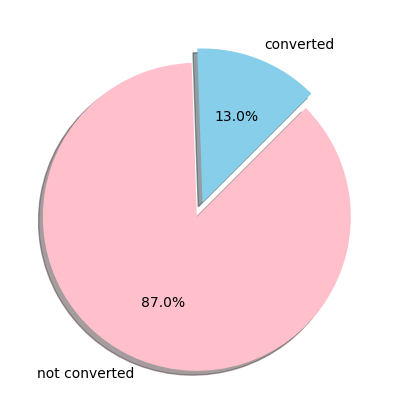

In [18]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
converted=data[data['status']=='converted']
not_converted=data[data['status']=='not converted']
ck=[converted['status'].count(),not_converted['status'].count()]
legpie=plt.pie(ck,labels=["converted","not converted"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))
plt.show()

In [19]:
data=data.dropna()
data=data.reset_index()

# Data Over Sampling

In [22]:
data=pd.concat([data,
                data[data['status']=='converted'],
                data[data['status']=='converted'],
                data[data['status']=='converted'],
                data[data['status']=='converted'],
                data[data['status']=='converted']]).reset_index()

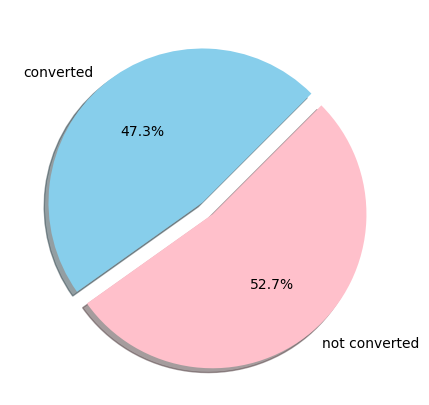

In [23]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
converted=data[data['status']=='converted']
not_converted=data[data['status']=='not converted']
ck=[converted['status'].count(),not_converted['status'].count()]
legpie=plt.pie(ck,labels=["converted","not converted"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))
plt.show()

In [24]:
data=data.sample(frac=1)
data=data.reset_index(drop=True)

# Tokenization

In [25]:
from nltk.tokenize import word_tokenize, sent_tokenize

tokenized=[word_tokenize(i) for i in data.status_information]

# Lemmatization

In [26]:
wl = WordNetLemmatizer()
ps=PorterStemmer()

corpus = []
for i in range(0, len(tokenized)):
    info = data['status_information'][i].split()
    
    info = [wl.lemmatize(word) for word in info if not word in stopwords.words('english')]
    info = ' '.join(info)
    corpus.append(info)

In [27]:
corpus

['shared detail',
 'looking career transition shared detail ringing response shared detail call tomorrow morning shall call u back cab prima share detail link check join session monday shared session link prima hi prima sorry delayed response bit busy office work well frankly speaking pleased yesterday session pracarrer transitionicall approach missing morning looking cantata science real time exmorningpless also change company side engaged external trainer conducarrer transition session house thank supporight',
 'call morning busy connecarrer transition come weekend ringing response',
 'informationrmed checking domo conform',
 'share detail busy readable',
 'check domo today evening get back take month time learn basic intermediate morning think get back interested',
 'ringing response ringing response ringing response ringing response',
 'july need friend share let know',
 'shared detail need call ringing response',
 'readable ringing response driving call tomorrow recorded session s

In [28]:
data.status_information=corpus

In [29]:
data.head()

,level_0,index,Unnamed: 0,location,executive_name,raw_information,status_information,status
0,391,428,428,pune,prema,5/7/17(prema): shared details no#,shared detail,not converted
1,226,245,245,chennai,prema,"17/7/17(prema): looking for ct, shared details...",looking career transition shared detail ringin...,converted
2,550,603,603,pune,surendra,12/6/17(surendra):call me after iam busy now 1...,call morning busy connecarrer transition come ...,converted
3,513,566,566,hyderabad,gowtham,19/6/17(gowtham)informed aftr checking demo he...,informationrmed checking domo conform,converted
4,806,861,861,hyderabad,surendra,10/5/17(surendra):share me details 11/5/17(sur...,share detail busy readable,not converted


# Save Lemmatized Final DataFrame

In [30]:
data.to_csv('lemmatize_lead_status_data.csv')

In [5]:
data=pd.read_csv(r'D:\data science projects\lead status project\lemmatize_lead_status_data.csv')

# First Model

In [6]:
x=data.status_information
y=data.status

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=7)

tvec=TfidfVectorizer(ngram_range=(1,3),stop_words='english').fit(x_train)

df_train=pd.DataFrame(tvec.transform(x_train).todense(),columns=tvec.get_feature_names())
df_test=pd.DataFrame(tvec.transform(x_test).todense(),columns=tvec.get_feature_names())

In [7]:
print(df_train.shape)
print(df_test.shape)
print(y_train.shape)
print(y_test.shape)

(1044, 7246)
(515, 7246)
(1044,)
(515,)


In [8]:
x_train

232     may ni shift weekend domo may attend weed batc...
840              shared detail need call ringing response
1165    ringing response flexible weekend call weekend...
468     share detail evening session ringing response ...
783     july ringing response aug recycle aug readable...
                              ...                        
211     shared detail data science development process...
502     june l june mind today mr try evening july att...
537     shared email shared email shared session detai...
1220    ringing response shared detail looking career ...
175                                       july interested
Name: status_information, Length: 1044, dtype: object

In [9]:
model=MultinomialNB()
model.fit(df_train,y_train)

model.score(df_test,y_test)

0.8116504854368932

In [10]:
model.score(df_train,y_train)

0.9233716475095786

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

predictions=model.predict(df_test)
print(accuracy_score(predictions,y_test))
print(confusion_matrix(predictions,y_test))
print(classification_report(predictions,y_test))

0.8116504854368932
[[222  69]
 [ 28 196]]
               precision    recall  f1-score   support

    converted       0.89      0.76      0.82       291
not converted       0.74      0.88      0.80       224

     accuracy                           0.81       515
    macro avg       0.81      0.82      0.81       515
 weighted avg       0.82      0.81      0.81       515



In [12]:
sample_info=tvec.transform(['ringing no response intrested in data science'])

model.predict(sample_info)

array(['converted'], dtype='<U13')

In [13]:
sample_info

<1x7246 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [14]:
import pickle
with open('lead_status_pkl','wb') as f:
    pickle.dump(model,f)

In [15]:
with open('lead_status_pkl' , 'rb') as f :
    model1 = pickle.load(f)
    


In [16]:
result=model1.predict(sample_info)

result

array(['converted'], dtype='<U13')

In [17]:
data=pd.read_csv(r'D:\data science projects\lead status project\lemmatize_lead_status_data.csv')

# information
x=data.status_information
y=data.status
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=7)
tvec=TfidfVectorizer(ngram_range=(1,3),stop_words='english').fit(x_train)



with open('lead_status_pkl' , 'rb') as f :
    mo = pickle.load(f)
    
info1=tvec.transform(['not intrested'])


print(mo.predict(info1))

['not converted']


# Second Model

In [29]:
x_location=data.location
y_location=data.status

x_location_train,x_location_test,y_location_train,y_location_test=train_test_split(x_location,y_location,test_size=0.33,random_state=7)

tvec_location=TfidfVectorizer(ngram_range=(1,3),stop_words='english').fit(x_location_train)

location_train=pd.DataFrame(tvec_location.transform(x_location_train).todense(),columns=tvec_location.get_feature_names())

location_test=pd.DataFrame(tvec_location.transform(x_location_test).todense(),columns=tvec_location.get_feature_names())


In [30]:
x_executive_name=data.executive_name
y_executive_name=data.status

x_executive_name_train,x_executive_name_test,y_executive_name_train,y_executive_name_test=train_test_split(x_executive_name,y_executive_name,test_size=0.33,random_state=7)

tvec_executive_name=TfidfVectorizer(ngram_range=(1,3),stop_words='english').fit(x_executive_name_train)

executive_name_train=pd.DataFrame(tvec_executive_name.transform(x_executive_name_train).todense(),columns=tvec_executive_name.get_feature_names())

executive_name_test=pd.DataFrame(tvec_executive_name.transform(x_executive_name_test).todense(),columns=tvec_executive_name.get_feature_names())

In [31]:
train=pd.concat([df_train,location_train,executive_name_train],axis=1)
test=pd.concat([df_test,location_test,executive_name_test],axis=1)

In [32]:
train.head()

,able,able straight,able straight th,abroad,abroad want,abroad want afternoon,accepting,accepting accepting,accepting accepting accepting,ad,...,usa,vijayawada,vishakapatnam,amar,gowtham,mohan,prema,sankar,soma,surendra
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
print(train.shape)
print(test.shape)
print(y_train.shape)
print(y_test.shape)

(1044, 7287)
(515, 7287)
(1044,)
(515,)


In [34]:
model2=MultinomialNB()
model2.fit(train,y_train)
model2.score(test,y_test)

0.7883495145631068

In [35]:
info1=tvec.transform(['ringing no response intrested in data science'])
location1=tvec_location.transform(['hyderabad'])
executive_name1=tvec_executive_name.transform(['mohan'])

In [36]:
from scipy.sparse import hstack

test=hstack((info1,location1,executive_name1))

In [37]:
model2.predict(test)

array(['converted'], dtype='<U13')

In [38]:
import pickle
with open('lead_status_pkl2','wb') as f:
    pickle.dump(model2,f)

In [39]:
with open('lead_status_pkl2' , 'rb') as f :
    pred_status = pickle.load(f)

In [40]:
pred_status.predict(test)

array(['converted'], dtype='<U13')